In [5]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import h5py
import datetime

In [144]:
def read_forcings(path,nz_=37):
    fp = open(path,'r')
    lines=fp.readlines()
    # determine number of timesteps first 
    t = 0
    for line in lines:
        if line[0]=='!':
            continue
        lsp = line.split(' ')
        if (lsp[1]==str(nz_) or (lsp[1]==(str(nz_)+'\n'))):
            t = t+1
    data={}
    headbool=True
    ti = -1
    alt = 0
    for line in lines:
        if line[0]=='!':
            continue
        if headbool:
            headbool = False
            lsp = line.split(' ')
            head_0 = [x for x in lsp if x != '']
            n = len(head_0)
            head=[]
            for x in head_0:
                if '\n' in x:
                    x = x[0:-1]
                head.append(x)
                data[x]=np.zeros((t,nz_))
            data['time']=[]
            continue
        lsp = line.split(' ')
        if (lsp[1]==str(nz_) or (lsp[1]==(str(nz_)+'\n'))):
            data['time'].append(float(lsp[0]))
            ti=ti+1
            alt=0
            continue
        for i in range(n):
            x = head[i]
            data[x][ti,alt]=float(lsp[i])
        alt=alt+1
    data['time']=np.array(data['time'])
    return data

In [110]:
file='/home/tsw35/soteria/clubb/data/sgp60varanarap_2012-2019.nc'
clubb_dir = '/home/tsw35/tyche/clubb/'

In [3]:
fp=nc.Dataset(file,'r')

In [4]:
time_s=fp['time'][:]
sw=fp['sw_dn_srf'][:]

In [7]:
timedt=[]
t_init=datetime.datetime(2012,5,1,0,0)
for t in time_s:
    timedt.append(t_init+datetime.timedelta(seconds))
timedt=np.array(timedt)

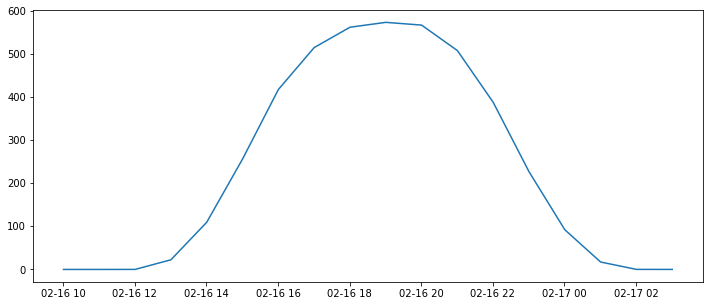

In [17]:
init=7000-6
plt.figure(figsize=(12,5))
plt.plot(timedt[init:init+18],sw[init:init+18])

In [40]:
((timedt[48]-timedt[0]).total_seconds()/3600)

47.996944444444445

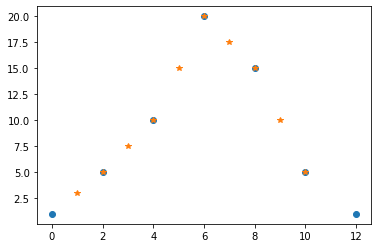

In [44]:
times=[1,2,3,4,5,6,7,8,9,10]
times_0=[0,2,4,6,8,10,12]
data_0 =[1,5,10,20,15,5,1]
data2=np.interp(times,times_0,data_0)
plt.plot(times_0,data_0,'o')
plt.plot(times,data2,'*')

In [97]:
test=[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0]

In [107]:
out=[0]
for t in range(1,len(test)):
    prev=out[t-1]
    print(prev)
    if (prev<.9)&(test[t]==1):
        out.append(prev+.2)
    elif (prev>.1)&(test[t]==0):
        out.append(prev-.2)
    else:
        out.append(test[t])

0
0
0
0
0
0
0.2
0.4
0.6000000000000001
0.8
1.0
1
1
1
1
1
0.8
0.6000000000000001
0.8
0.6000000000000001
0.8
1.0
0.8
0.6000000000000001
0.4000000000000001
0.20000000000000007
5.551115123125783e-17
0
0
0


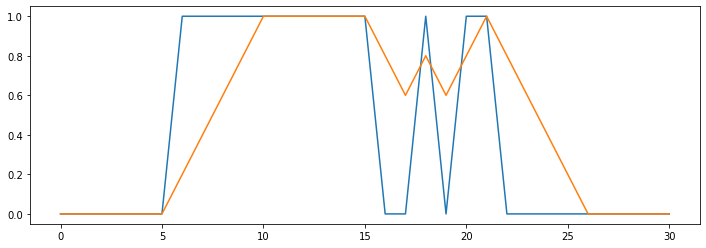

In [108]:
plt.figure(figsize=(12,4))
plt.plot(test)
plt.plot(out)

In [136]:
fp_zt=nc.Dataset(clubb_dir+'test_cpl7/k_2/agg_outzt.nc','r')
fp_zm=nc.Dataset(clubb_dir+'test_cpl7/k_2/agg_outzm.nc','r')
fp_sfc=nc.Dataset(clubb_dir+'test_cpl7/k_2/agg_outsfc.nc','r')

In [165]:
fp_zt.close()
fp_zm.close()
fp_sfc.close()

In [145]:
wm=fp_zt['wm'][:,:,0,0]
frc=read_forcings(clubb_dir+'test_cpl7/arm_forcings_o.in')

In [146]:
for k in frc.keys():
    print(k)

Press[Pa]
T_f[K\s]
rtm_f[kg\kg\s]
um_ref[m\s]
vm_ref[m\s]
um_f[m\s^2]
vm_f[m\s^2]
omega[Pa\s]
ug[m\s]
vg[m\s]
time


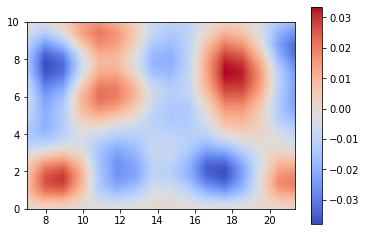

In [138]:
plt.imshow(np.transpose(wm),cmap='coolwarm',extent=[7,860/60+7,0,10],origin='lower')
plt.colorbar()

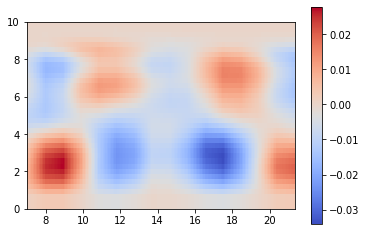

In [154]:
plt.imshow(np.transpose(-frc['omega[Pa\s]'][:]/9.8),cmap='coolwarm',extent=[7,860/60+7,0,10],origin='lower')
plt.colorbar()

(37, 181)
(895, 301)


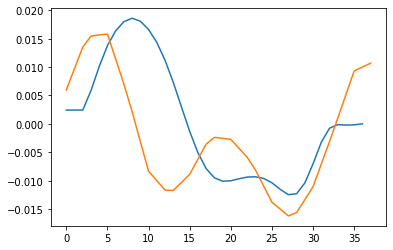

In [164]:
wfrc=np.transpose(-frc['omega[Pa\s]'][:]/9.8/1.2)
print(wfrc.shape)
print(wm.shape)
plt.plot(wfrc[:,10])
plt.plot(wm[::24,20])

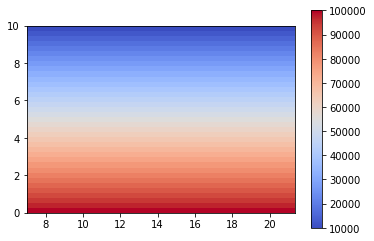

In [152]:
plt.imshow(np.transpose(frc['Press[Pa]']),cmap='coolwarm',extent=[7,860/60+7,0,10],origin='lower')
plt.colorbar()

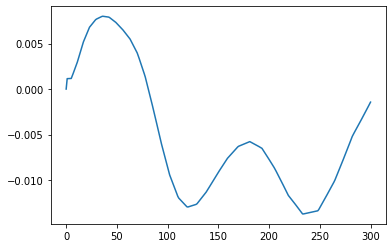

In [143]:
plt.plot(wm[0,:])

In [166]:
def checker():
    a = ['hello']
    b = 7
    c = np.array([1,2,3,4,5])
    
    return a,b,c


In [171]:
d,e=checker()[0:2]

In [173]:
e

7

In [174]:
F = np.ones((2,6))

In [175]:
np.max(F,axis=1)

array([1., 1.])